In [1]:
%matplotlib inline
from set_gpu import *
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data/MNIST_data/', one_hot=True)

Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# set model math to save/resotre
model_path = "models/mnist-shallow/model2.ckpt"

hidden_units = 1024
x = tf.placeholder(tf.float32, [None, 784], name='x')
y_ = tf.placeholder(tf.float32, [None, 10], name='y_')
weights = {
    'h1': tf.Variable(tf.random_normal([784, hidden_units], stddev=tf.sqrt(2/(784+hidden_units)), mean=0)),
    'h2': tf.Variable(tf.random_normal([hidden_units, hidden_units], stddev=tf.sqrt(1/hidden_units), mean=0)),
    'h3': tf.Variable(tf.random_normal([hidden_units, hidden_units], stddev=tf.sqrt(1/hidden_units), mean=0)),
    'h4': tf.Variable(tf.random_normal([hidden_units, hidden_units], stddev=tf.sqrt(1/hidden_units), mean=0)),
    'h5': tf.Variable(tf.random_normal([hidden_units, hidden_units], stddev=tf.sqrt(1/hidden_units), mean=0)),
    'y': tf.Variable(tf.random_normal([hidden_units, 10], stddev=tf.sqrt(2/(hidden_units+10)), mean=0))
} # xavier init
biases = {
    'b1': tf.Variable(tf.zeros([hidden_units])),
    'b2': tf.Variable(tf.zeros([hidden_units])),
    'b3': tf.Variable(tf.zeros([hidden_units])),
    'b4': tf.Variable(tf.zeros([hidden_units])),
    'b5': tf.Variable(tf.zeros([hidden_units])),
    'y': tf.Variable(tf.zeros([10]))
}

# for batch norm
epsilon = 1e-3 # a small float to avoid div by 0
scale = tf.ones([hidden_units])
beta = tf.zeros([hidden_units]) # offset

In [4]:
# linear combination -> batch_norm -> activation -> dropout

hidden_1 = tf.nn.relu(tf.matmul(x, weights['h1']) + biases['b1'])
#batch_mean, batch_var = tf.nn.moments(hidden_1, [0])
#batch_norm_1 = tf.nn.batch_normalization(hidden_1, batch_mean, batch_var, None, None, epsilon)
#dropout_1 = tf.nn.dropout(tf.nn.relu(batch_norm_1), .4)    

hidden_2 = tf.nn.relu(tf.matmul(hidden_1, weights['h2']) + biases['b2'])
#batch_mean, batch_var = tf.nn.moments(hidden_2, [0])
#batch_norm_2 = tf.nn.batch_normalization(hidden_2, batch_mean, batch_var, None, None, epsilon)
#dropout_2 = tf.nn.dropout(tf.nn.relu(batch_norm_2), .4) 

hidden_3 = tf.nn.relu(tf.matmul(hidden_2, weights['h3']) + biases['b3'])
#batch_mean, batch_var = tf.nn.moments(hidden_3, [0])
#batch_norm_3 = tf.nn.batch_normalization(hidden_3, batch_mean, batch_var, None, None, epsilon)
#dropout_3 = tf.nn.dropout(tf.nn.relu(batch_norm_3), .4) 

hidden_4 = tf.nn.relu(tf.matmul(hidden_3, weights['h4']) + biases['b4'])
#batch_mean, batch_var = tf.nn.moments(hidden_4, [0])
#batch_norm_4 = tf.nn.batch_normalization(hidden_4, batch_mean, batch_var, None, None, epsilon)
#dropout_4 = tf.nn.dropout(tf.nn.relu(batch_norm_4), .4) 

hidden_5 = tf.nn.relu(tf.matmul(hidden_4, weights['h5']) + biases['b5'])
#batch_mean, batch_var = tf.nn.moments(hidden_5, [0])
#batch_norm_5 = tf.nn.batch_normalization(hidden_5, batch_mean, batch_var, None, None, epsilon)
#dropout_5 = tf.nn.dropout(tf.nn.relu(batch_norm_5), .4) 

y = tf.matmul(hidden_5, weights['y']) + biases['y']

In [5]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y, labels=y_))
train_step = tf.train.AdamOptimizer(.0001).minimize(cross_entropy)

In [6]:
init = tf.global_variables_initializer()

In [7]:
# saver obj to save/retrieve model
saver = tf.train.Saver() 

In [13]:
sess = tf.Session(config=config)
sess.run(init)

In [14]:
# train func

def train(mnist, sess, train_step, cross_entropy):
    i = 550
    epochs = 50
    display_step = 1

    for epoch in range(epochs):
        avg_cost = 0
        for _ in range(i):
            batch_xs, batch_ys = mnist.train.next_batch(100)
            _, cost = sess.run([train_step, cross_entropy], feed_dict={'x:0': batch_xs, 'y_:0': batch_ys})
            avg_cost += cost/i
        if epoch%display_step==0:
            print("Epoch:", '%02d'%(epoch+1), "\tcost={:.9f}".format(avg_cost))

In [15]:
train(mnist, sess, train_step, cross_entropy)

Epoch: 01 	cost=0.308158701
Epoch: 02 	cost=0.104051820
Epoch: 03 	cost=0.064420025
Epoch: 04 	cost=0.041513531
Epoch: 05 	cost=0.028730659
Epoch: 06 	cost=0.019593434
Epoch: 07 	cost=0.016509421
Epoch: 08 	cost=0.011214017
Epoch: 09 	cost=0.012797758
Epoch: 10 	cost=0.009444008
Epoch: 11 	cost=0.009825363
Epoch: 12 	cost=0.007510452
Epoch: 13 	cost=0.009674547
Epoch: 14 	cost=0.007070621
Epoch: 15 	cost=0.008752603
Epoch: 16 	cost=0.005820285
Epoch: 17 	cost=0.006214108
Epoch: 18 	cost=0.003818299
Epoch: 19 	cost=0.008404477
Epoch: 20 	cost=0.005452839
Epoch: 21 	cost=0.004848849
Epoch: 22 	cost=0.008018450
Epoch: 23 	cost=0.002518609
Epoch: 24 	cost=0.002082388
Epoch: 25 	cost=0.008568506
Epoch: 26 	cost=0.003341781
Epoch: 27 	cost=0.006861400
Epoch: 28 	cost=0.003680519
Epoch: 29 	cost=0.003584975
Epoch: 30 	cost=0.003585211
Epoch: 31 	cost=0.003785598
Epoch: 32 	cost=0.005266891
Epoch: 33 	cost=0.002438171
Epoch: 34 	cost=0.004274180
Epoch: 35 	cost=0.003406585
Epoch: 36 	cost=0.00

In [11]:
# test func

def test(y, y_, mnist):
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = 100*tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return sess.run(accuracy, feed_dict={'x:0': mnist.test.images, 'y_:0': mnist.test.labels})

In [16]:
print('Accuracy = {:.2f}%'.format(test(y, y_, mnist)))

Accuracy = 98.55%


In [17]:
# save model
save_path = saver.save(sess, model_path)

In [9]:
# restore model
saver.restore(sess, model_path)

INFO:tensorflow:Restoring parameters from models/mnist-shallow/model2.ckpt


In [18]:
# dict of lists to store s, u, v values of svd
svd = {'s':[], 'u':[], 'v':[]}

for layer in weights:
    if layer!='y':
        s, u, v = tf.svd(weights[layer])
        svd['s'].append(s)
        svd['u'].append(u)
        svd['v'].append(v)

Having a look at the shape of the S matrix

In [27]:
for val in svd['s']:
    print(val.shape)

(784,)
(1024,)
(1024,)
(1024,)
(1024,)


In [19]:
# feedforward with different values of D 

d = [10, 20, 50, 100, 200, 1024]
accuracies = []

for dval in d:
    if dval==1024: # for d=full
        hidden1_svd = tf.nn.relu(tf.add(tf.matmul(x, tf.matmul(tf.matmul(svd['u'][0][:,:784], tf.diag(svd['s'][0])[:784,:784]), 
                                              tf.transpose(svd['v'][0][:,:784]))), biases['b1']))  
    else:
        hidden1_svd = tf.nn.relu(tf.add(tf.matmul(x, tf.matmul(tf.matmul(svd['u'][0][:,:dval], tf.diag(svd['s'][0])[:dval,:dval]), 
                                              tf.transpose(svd['v'][0][:,:dval]))), biases['b1']))  

    hidden2_svd = tf.nn.relu(tf.add(tf.matmul(hidden1_svd, tf.matmul(tf.matmul(svd['u'][1][:,:dval], tf.diag(svd['s'][1])[:dval,:dval]), 
                                              tf.transpose(svd['v'][1][:,:dval]))), biases['b2']))

    hidden3_svd = tf.nn.relu(tf.add(tf.matmul(hidden2_svd, tf.matmul(tf.matmul(svd['u'][2][:,:dval], tf.diag(svd['s'][2])[:dval,:dval]), 
                                              tf.transpose(svd['v'][2][:,:dval]))), biases['b3']))

    hidden4_svd = tf.nn.relu(tf.add(tf.matmul(hidden3_svd, tf.matmul(tf.matmul(svd['u'][3][:,:dval], tf.diag(svd['s'][3])[:dval,:dval]), 
                                              tf.transpose(svd['v'][3][:,:dval]))), biases['b4']))

    hidden5_svd = tf.nn.relu(tf.add(tf.matmul(hidden4_svd, tf.matmul(tf.matmul(svd['u'][4][:,:dval], tf.diag(svd['s'][4])[:dval,:dval]), 
                                              tf.transpose(svd['v'][4][:,:dval]))), biases['b5']))

    y_svd = tf.nn.softmax(tf.add(tf.matmul(hidden5_svd, weights['y']), biases['y']))
    
    
    accuracies.append(test(y_svd, y_, mnist))
    
    if dval==1024:
        print('full done')
    else:
        print(dval,"done")

10 done
20 done
50 done
100 done
200 done
full done


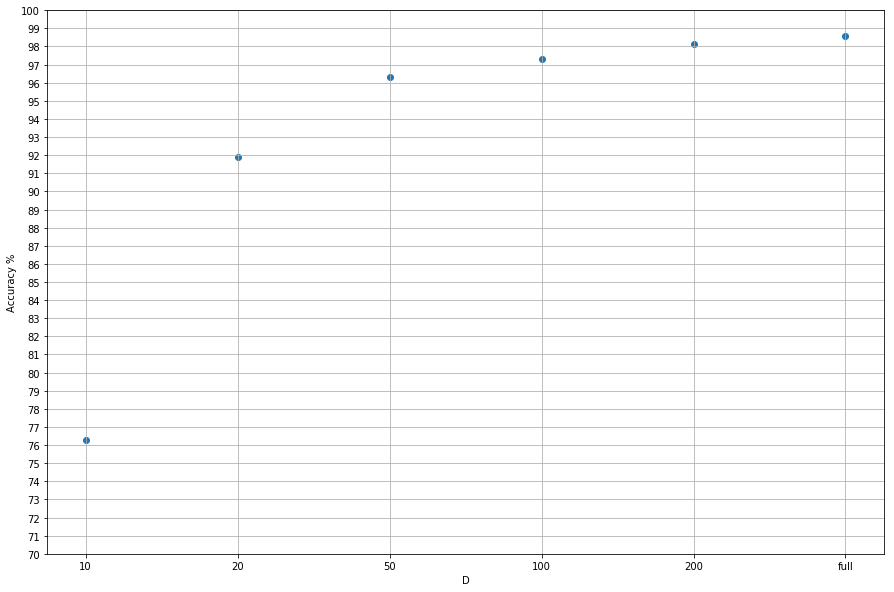

In [20]:
# plotting accuracies for all values of D

plt.figure(figsize=(15, 10))
plt.scatter(np.arange(6), accuracies)
plt.xticks(np.arange(6), [str(val) for val in d[:-1]]+['full'])
plt.yticks(np.arange(70, 101, 1))
plt.xlabel('D')
plt.ylabel('Accuracy %')
plt.grid(True)
plt.show()

The plot above shows the change in accuracies as the singular values D vary. It can be seen that the accuracy increases with the increase in D. The accuracy when D=full is as good as the baseline while D=10 gives the worst performance among the others. Although the accuracy is low for lower values of D, they reduce the amount of computation during feedforward. These values can be thus be used to initialize weights for a compressed network, which can be finetuned to get better accuracy.   

In [21]:
# path to save/load new model 
svd_20_path = "models/mnist-shallow/svd_20.ckpt"

In [22]:
# helper to generate keys for weights/biases dict

keys = []

for i in range(5):
    keys.append('{}_u'.format(i+1))
    keys.append('{}_v'.format(i+1))
keys.append('y')

In [23]:
# store global variables that have been initialized till now
initialized = set(tf.global_variables())

In [24]:
# new weights and biases for D=20

weights_20 = {}
biases_20 = {}
 
for key in keys[:-1]:
    layer = int(key[0])-1
    svd_mat = key[-1]
    
    if svd_mat=='u':
        weights_20['h'+key] =  tf.Variable(sess.run(svd['u'][layer][:,:20]))
        biases_20['b'+key] = tf.Variable(tf.zeros([20]))
    else:
        weights_20['h'+key] = tf.Variable(sess.run(tf.matmul(
            tf.diag(svd['s'][layer])[:20,:20], 
            tf.transpose(svd['v'][layer][:,:20])
        )))
        biases_20['b'+key] = tf.Variable(tf.zeros([hidden_units]))
        
weights_20['y'] = tf.Variable(sess.run(weights['y']))
biases_20['y'] = tf.Variable(tf.zeros([10]))

In [25]:
# new n/w architecture

hidden1_u = tf.nn.relu(tf.matmul(x, weights_20['h1_u']) + biases_20['b1_u'])
hidden1_v = tf.nn.relu(tf.matmul(hidden1_u, weights_20['h1_v']) + biases_20['b1_v'])

hidden2_u = tf.nn.relu(tf.matmul(hidden1_v, weights_20['h2_u']) + biases_20['b2_u'])
hidden2_v = tf.nn.relu(tf.matmul(hidden2_u, weights_20['h2_v']) + biases_20['b2_v'])

hidden3_u = tf.nn.relu(tf.matmul(hidden2_v, weights_20['h3_u']) + biases_20['b3_u'])
hidden3_v = tf.nn.relu(tf.matmul(hidden3_u, weights_20['h3_v']) + biases_20['b3_v'])

hidden4_u = tf.nn.relu(tf.matmul(hidden3_v, weights_20['h4_u']) + biases_20['b4_u'])
hidden4_v = tf.nn.relu(tf.matmul(hidden4_u, weights_20['h4_v']) + biases_20['b4_v'])

hidden5_u = tf.nn.relu(tf.matmul(hidden4_v, weights_20['h5_u']) + biases_20['b5_u'])
hidden5_v = tf.nn.relu(tf.matmul(hidden5_u, weights_20['h5_v']) + biases_20['b5_v'])

y_20 = tf.matmul(hidden5_v, weights_20['y']) + biases_20['y']

In [26]:
cross_entropy_20 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_20, labels=y_))
train_step_20 = tf.train.AdamOptimizer().minimize(cross_entropy_20)

In [27]:
# init only new variables 
sess.run(tf.variables_initializer(set(tf.global_variables()) - initialized))

In [32]:
train(mnist, sess, train_step_20, cross_entropy_20)

Epoch: 01 	cost=0.025180072
Epoch: 02 	cost=0.021299959
Epoch: 03 	cost=0.020269438
Epoch: 04 	cost=0.021382123
Epoch: 05 	cost=0.015896063
Epoch: 06 	cost=0.020531045
Epoch: 07 	cost=0.024283398
Epoch: 08 	cost=0.021523427
Epoch: 09 	cost=0.023597770
Epoch: 10 	cost=0.019215811
Epoch: 11 	cost=0.022588605
Epoch: 12 	cost=0.019381890
Epoch: 13 	cost=0.020448377
Epoch: 14 	cost=0.024595842
Epoch: 15 	cost=0.017237076
Epoch: 16 	cost=0.015975158
Epoch: 17 	cost=0.018712164
Epoch: 18 	cost=0.019698384
Epoch: 19 	cost=0.022255920
Epoch: 20 	cost=0.023224746
Epoch: 21 	cost=0.017358900
Epoch: 22 	cost=0.017553471
Epoch: 23 	cost=0.028187710
Epoch: 24 	cost=0.014870938
Epoch: 25 	cost=0.016509837
Epoch: 26 	cost=0.015014031
Epoch: 27 	cost=0.022046055
Epoch: 28 	cost=0.015916045
Epoch: 29 	cost=0.016236033
Epoch: 30 	cost=0.021404265
Epoch: 31 	cost=0.013881243
Epoch: 32 	cost=0.013140946
Epoch: 33 	cost=0.018450375
Epoch: 34 	cost=0.019727645
Epoch: 35 	cost=0.023245887
Epoch: 36 	cost=0.01

In [26]:
# save new model
save_path_20 = saver.save(sess, svd_20_path)

In [31]:
# restore svd model
saver.restore(sess, svd_20_path)

INFO:tensorflow:Restoring parameters from models/mnist-shallow/svd_20.ckpt


In [33]:
print('Accuracy = {:.2f}%'.format(test(y_20, y_, mnist)))

Accuracy = 97.19%


In [34]:
sess.close()